In [1]:
import cv2
import matplotlib.pyplot as plt
from clustimage import Clustimage
import glob
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import numpy

In [2]:
images=[]
pathnames= os.listdir('birds/single')
for i in range( len(pathnames)):
    images.append(str(pathnames[i]))
images.remove('test.ipynb')
# images.remove('.ipynb_checkpoints')

In [3]:
images.remove('.ipynb_checkpoints')

In [ ]:
imgs = []
for i in range(len(images)):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (128, 128))
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # edge = cv2.Canny(im_rgb, 10, 80)   
    imgs.append(im_rgb)


In [106]:
imgs[0]
print(imgs[0].shape)

(128, 128)


In [113]:
arr = numpy.array(imgs)
print(arr[0])
print(arr[0].shape)

[[ 87 102  93 ... 164 139 147]
 [ 65  76  77 ... 162 144 142]
 [ 80  91 101 ... 132 134 118]
 ...
 [ 88 103 181 ... 143 136 126]
 [127  97 139 ... 139  83 120]
 [158 123 124 ... 156 107 102]]
(128, 128)


In [118]:
flat = []
for i in range(len(arr)):
    a=arr[i].flatten()
    flat.append(a)

In [120]:
flat = numpy.array(flat)

In [79]:
#creating hog features
hogs= []
for i in range(len(images)):
	fd, hog_image = hog(imgs[i], orientations=9, pixels_per_cell=(8, 8), 
					cells_per_block=(2, 2), visualize=True, feature_vector=True)
	hogs.append(fd)

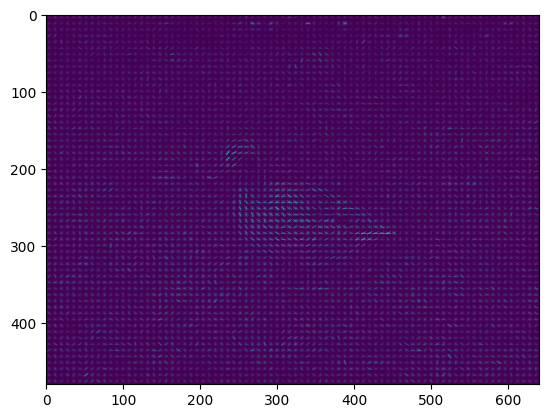

In [72]:
plt.imshow(hog_image)

In [63]:
print(len(hogs),hogs[0].shape)

59 (8100,)


In [89]:
cl = Clustimage(method='hog')

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


In [123]:
results = cl.fit_transform(flat ,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=6,
                           cluster_space='high')

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
100%|██████████| 59/59 [00:00<00:00, 1069.98it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 59/59 [00:06<00:00,  8.98it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=59, features=16384
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [hog] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 3/3 [00:00<00:00, 47.03it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (59, 16384) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


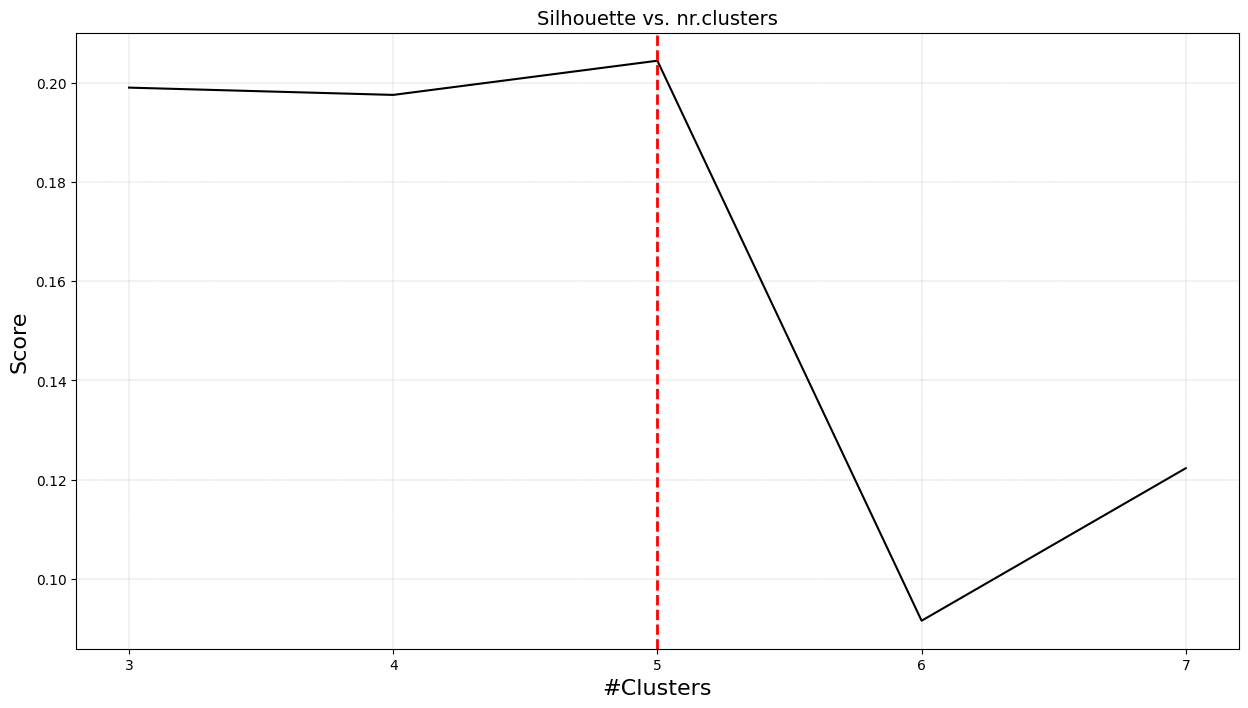

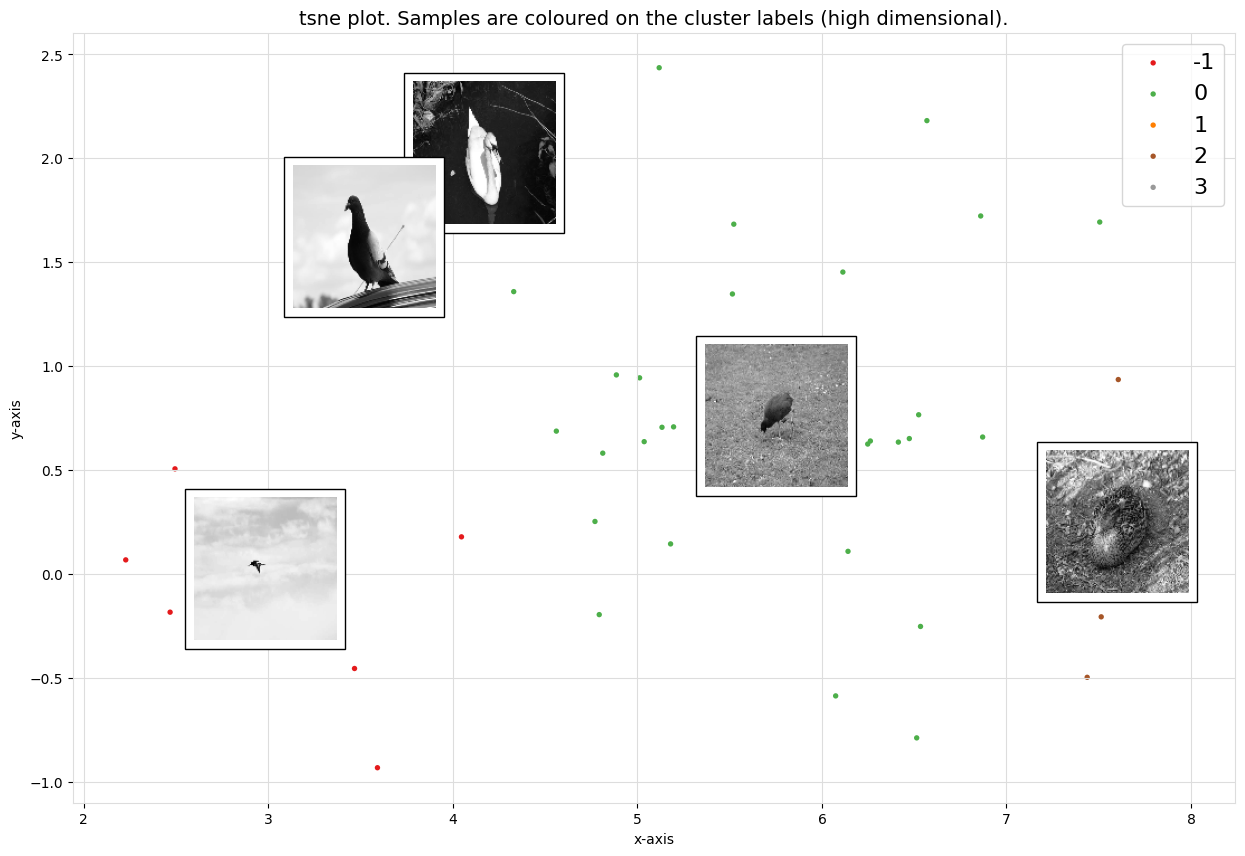

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [166]:
cl.clusteval.plot()
cl.scatter(zoom=0.8, img_mean=False)

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=1065.754. Be patient now..
[clusteval] >Compute cluster labels.


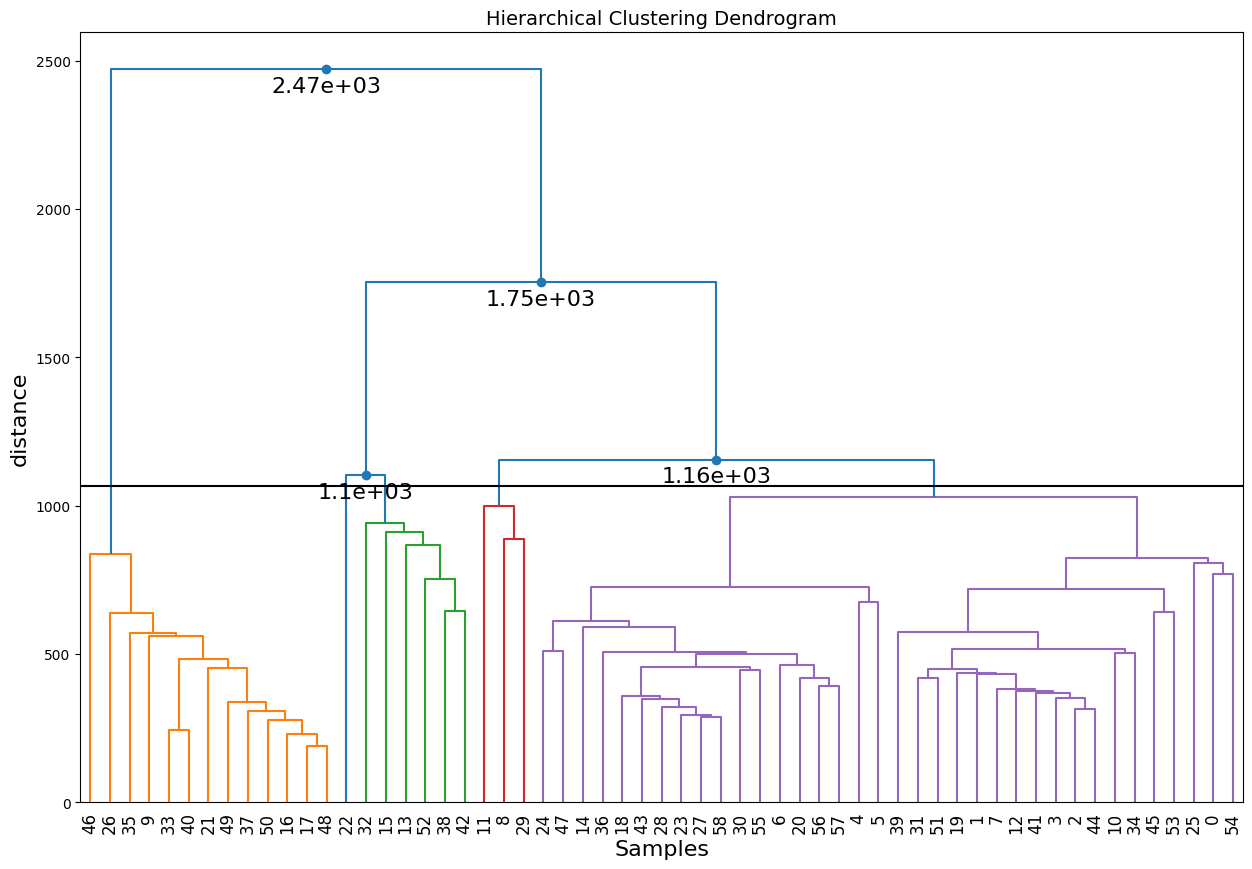

In [125]:
cl.dendrogram()

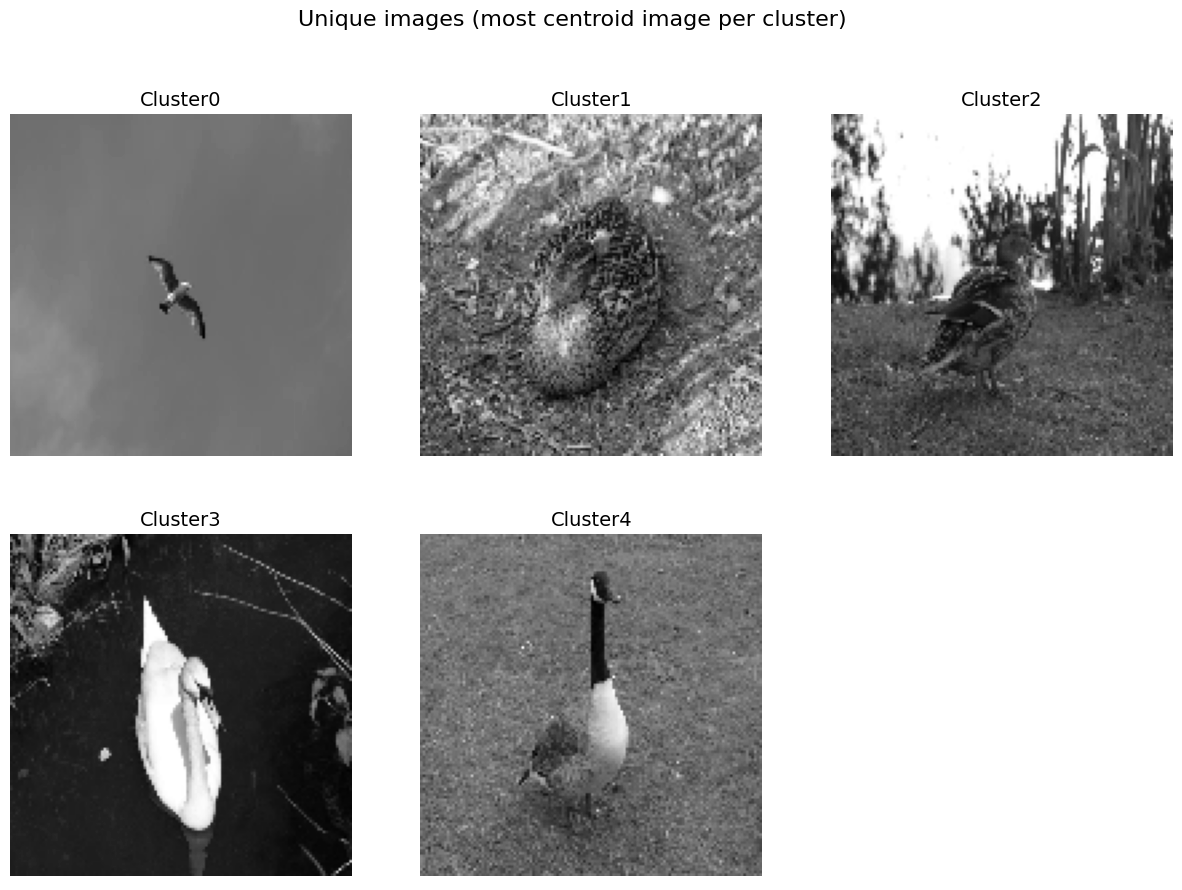

In [126]:
cl.plot_unique(img_mean=False)

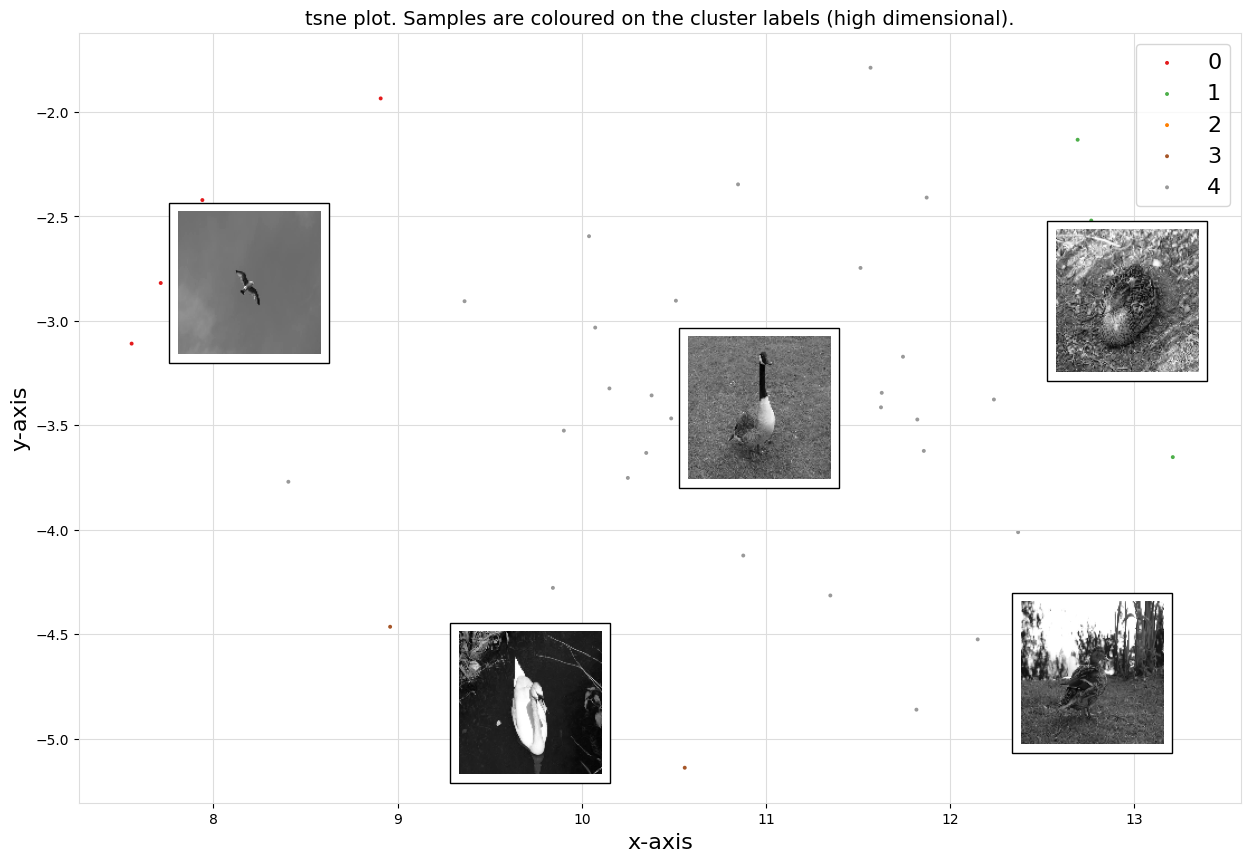

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [130]:
cl.scatter(dotsize=8, zoom=0.8, img_mean=False)

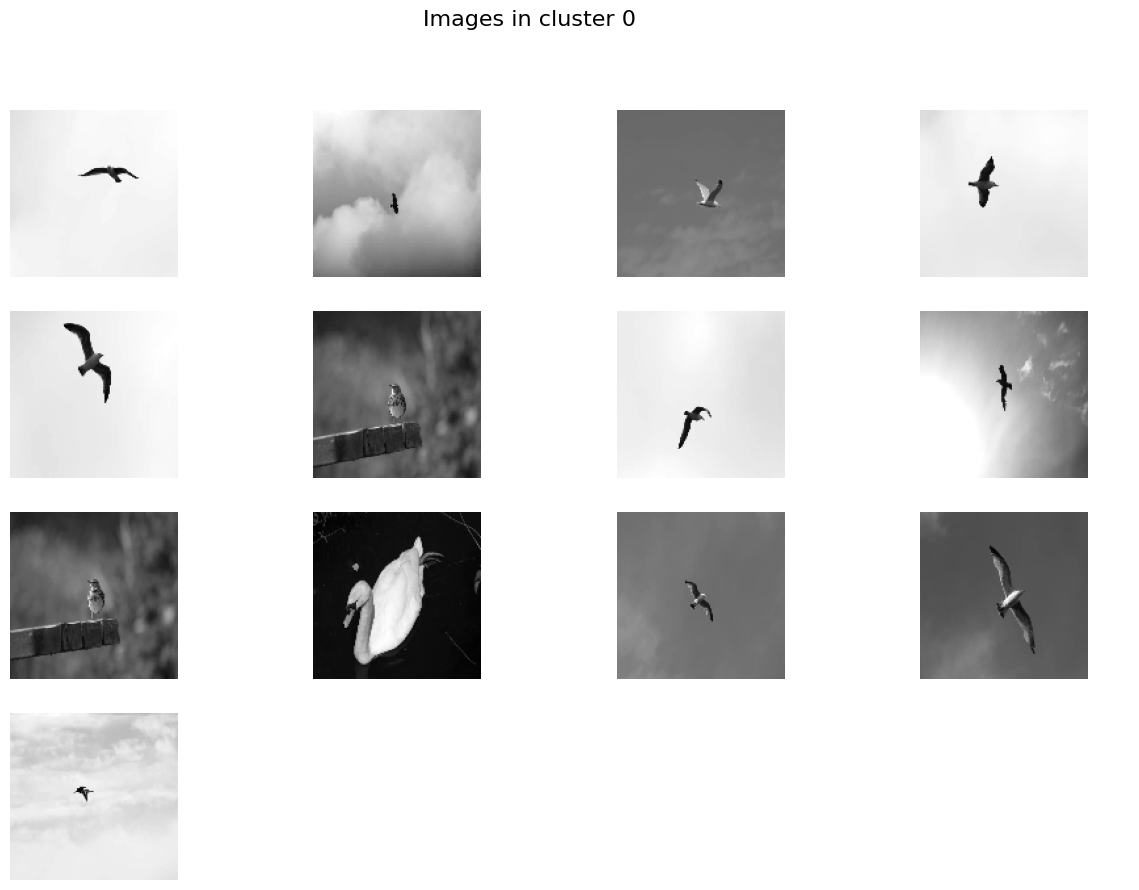

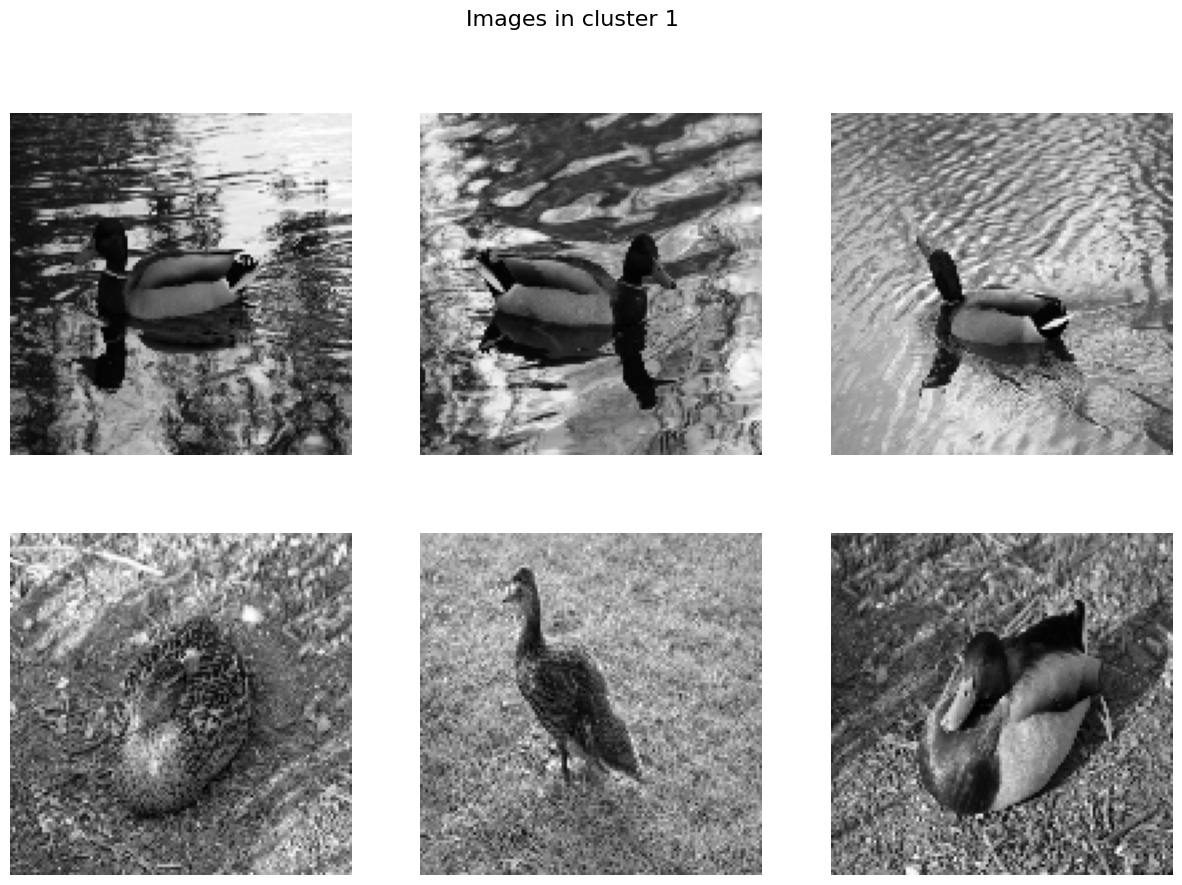

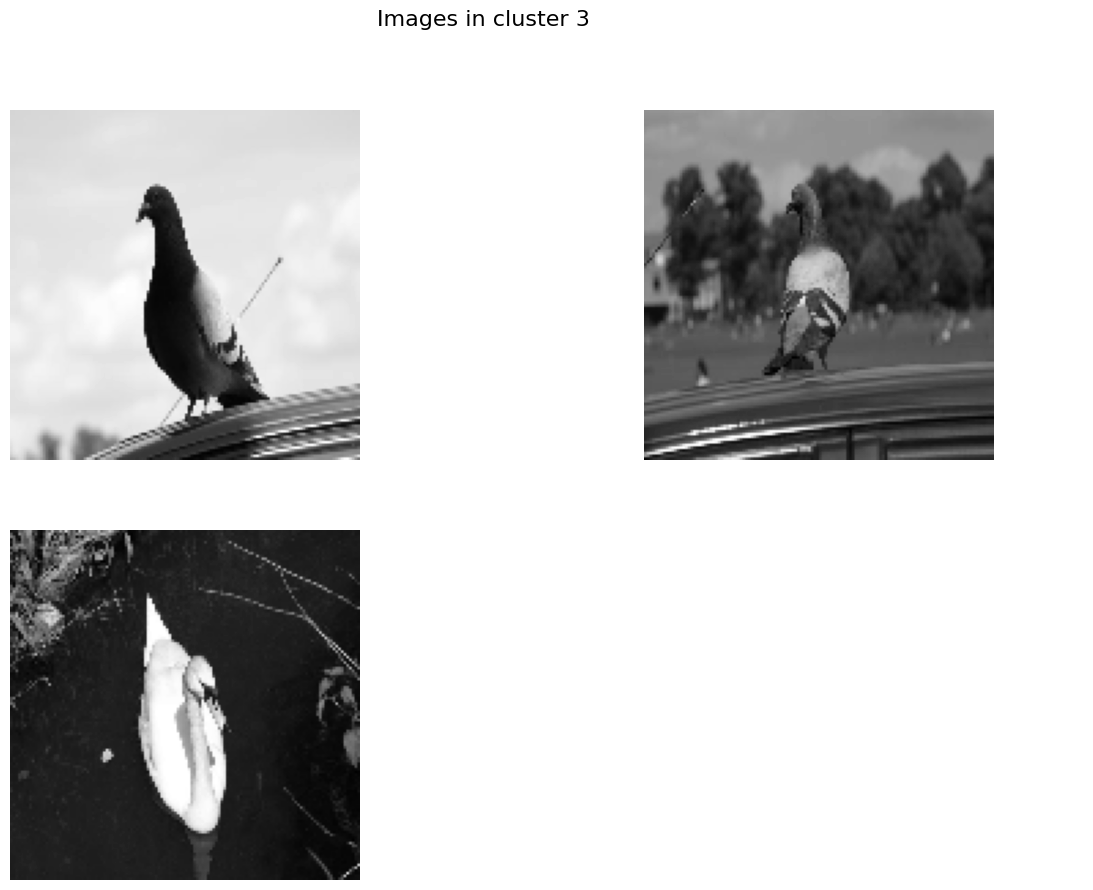

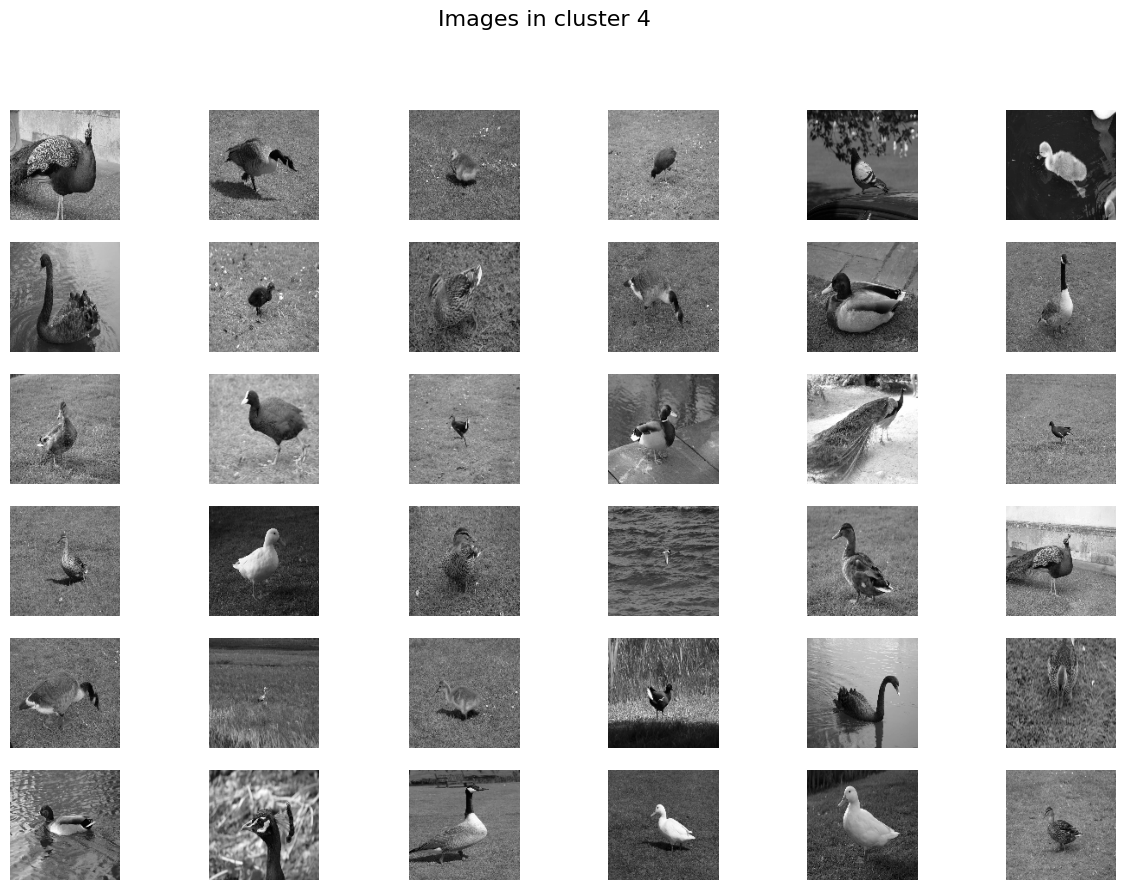

In [132]:
cl.plot(labels=0, show_hog=False)
cl.plot(labels=1, show_hog=False)
cl.plot(labels=2, show_hog=False)
cl.plot(labels=3, show_hog=False)
cl.plot(labels=4, show_hog=False)

In [164]:
results1 = cl.fit_transform(flat ,
                           cluster='kmeans',
                           evaluate='silhouette',
                           metric='euclidean',
                           linkage='ward',
                           min_clust=3,
                           max_clust=8,
                           cluster_space='high')


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 5/5 [00:10<00:00,  2.10s/it]

[clusteval] >Optimal number clusters detected: [5].
[clusteval] >Fin.


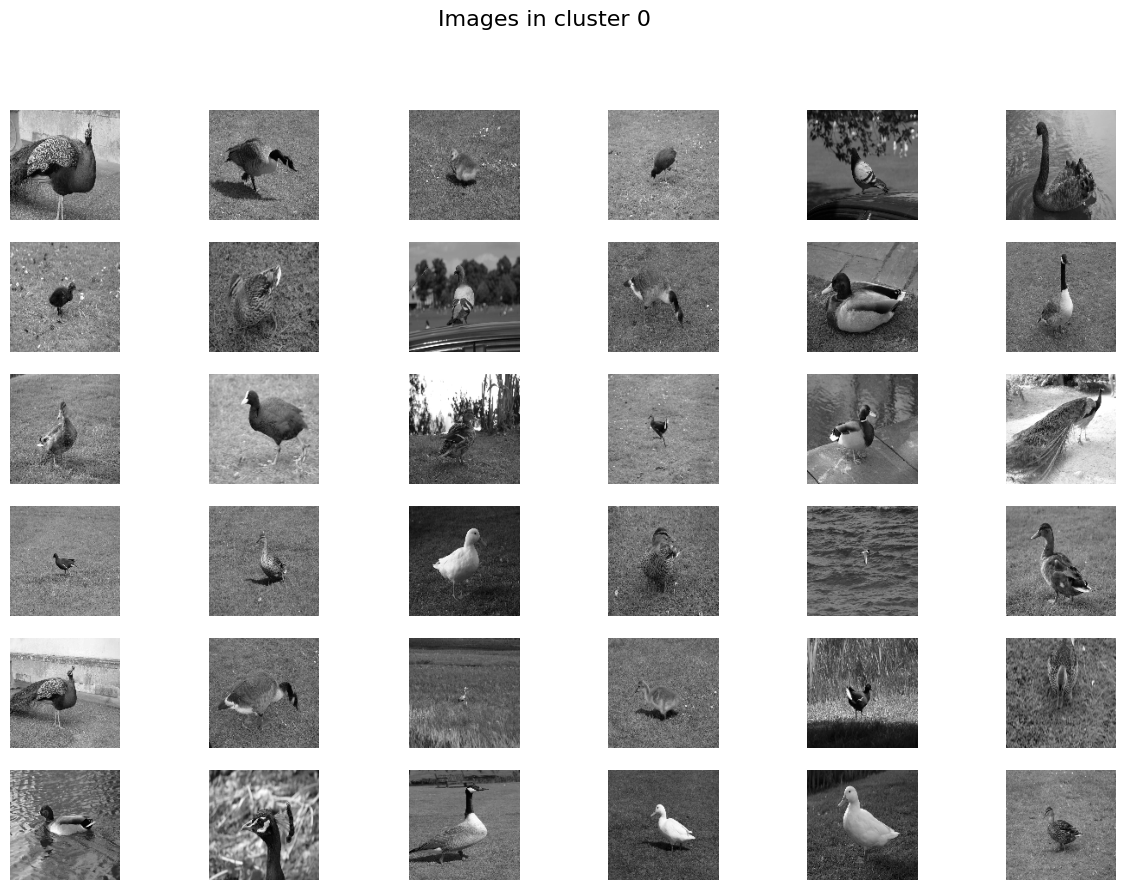

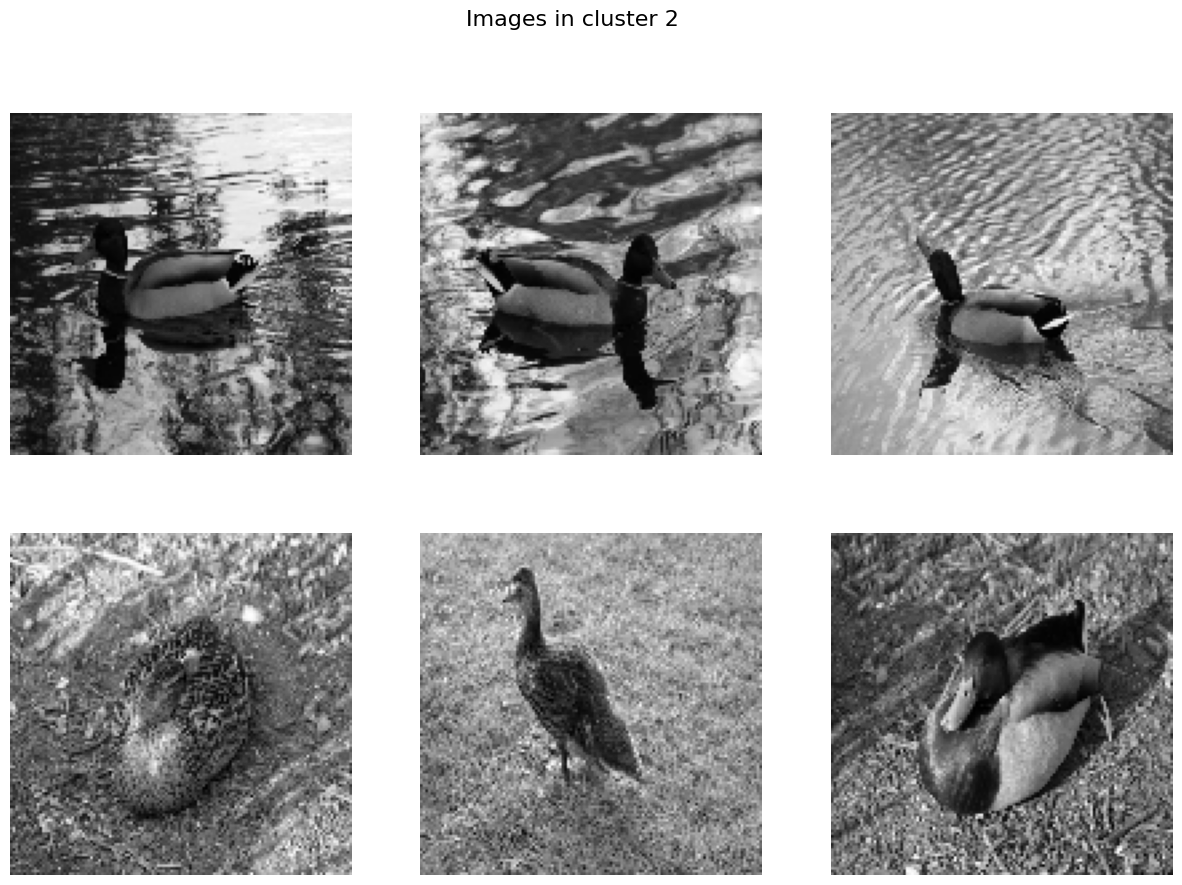

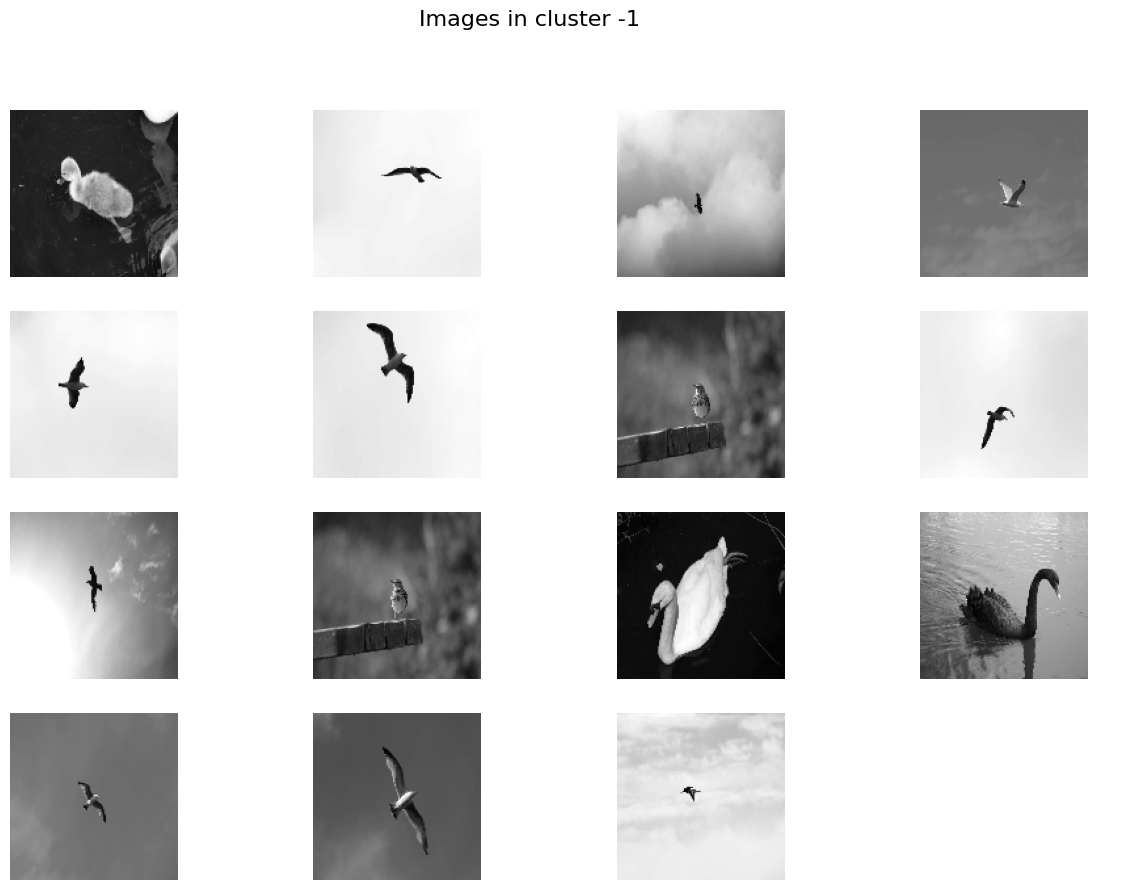

In [167]:
cl.plot(labels=0, show_hog=False)
cl.plot(labels=1, show_hog=False)
cl.plot(labels=2, show_hog=False)
cl.plot(labels=-1, show_hog=False)
# cl.plot(labels=4, show_hog=False)

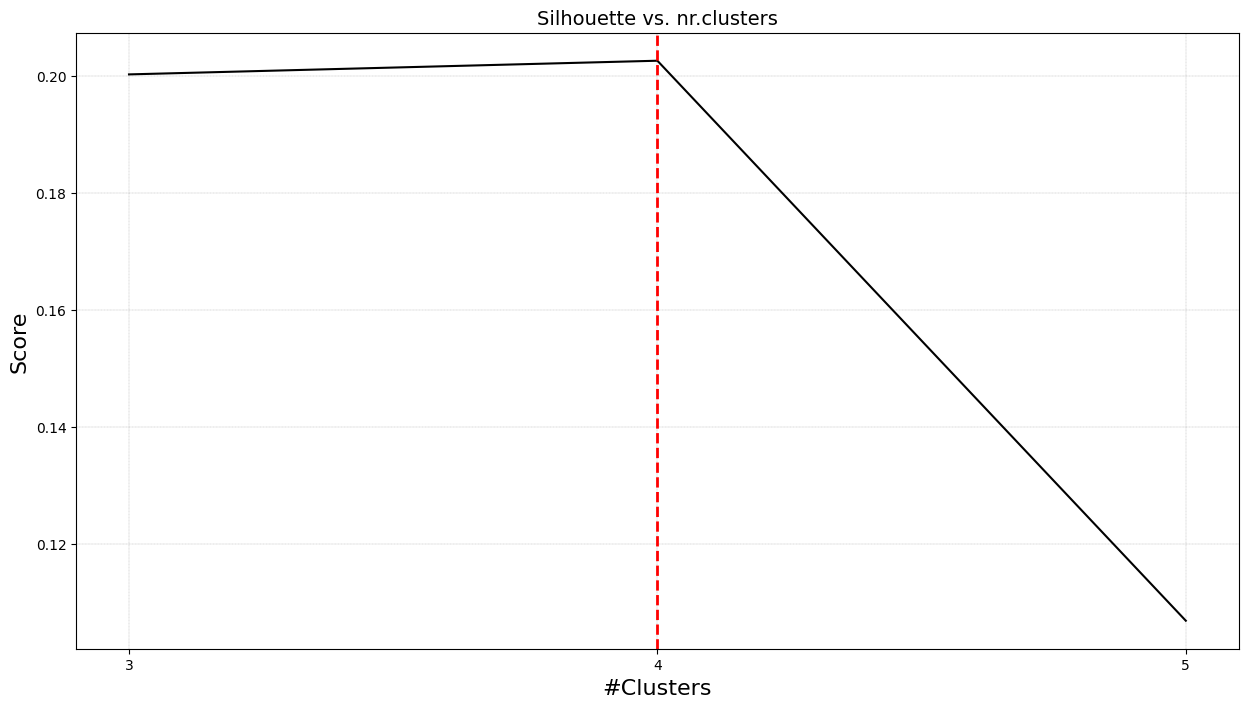

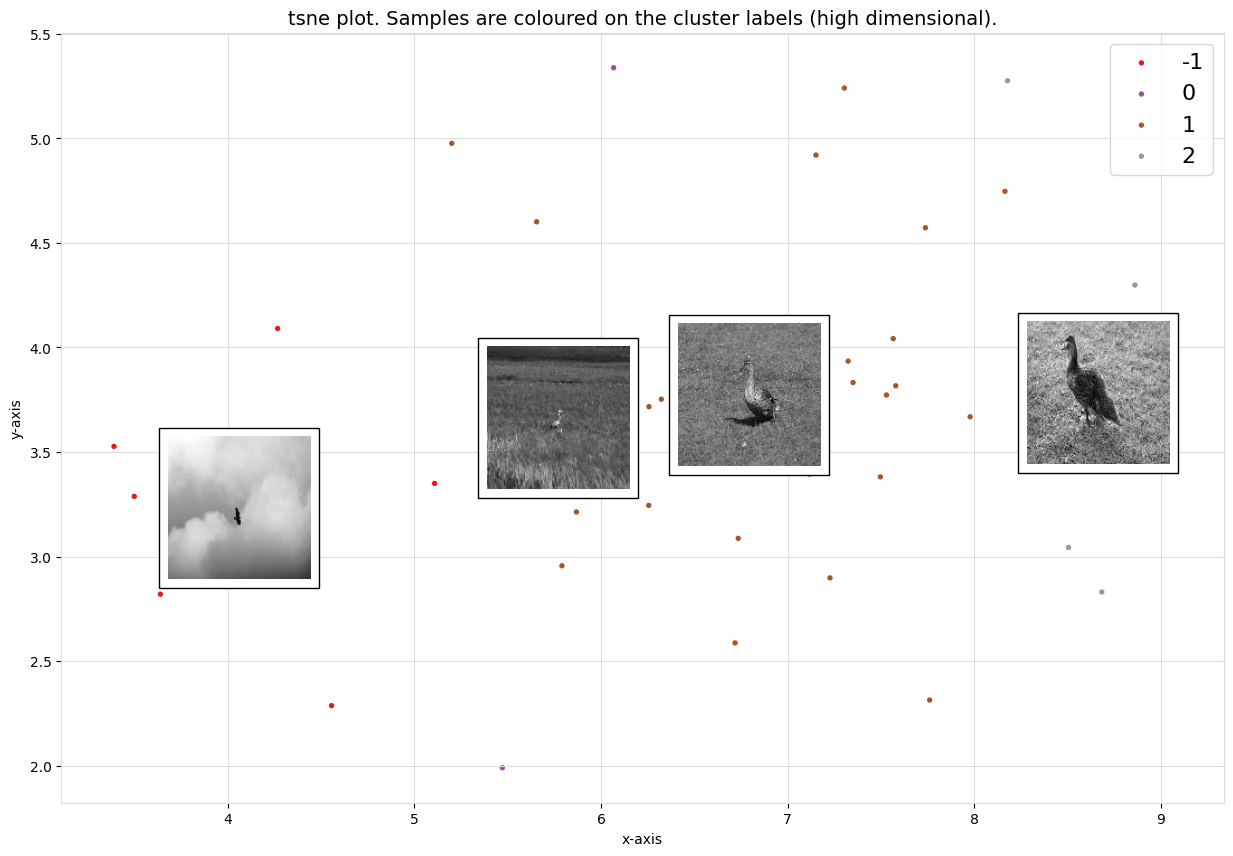

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [163]:
cl.clusteval.plot()
cl.scatter(zoom=0.8, img_mean=False)